In [ ]:
#Importing imp lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [ ]:
#Loaded the data from the provided Excel file.
df = pd.read_excel("/content/F4FQ2.xlsx")

In [ ]:
df.head()

,S.N.,Date,Reference/From where did they come to know about us?,comments
0,1,2024-04-25 00:00:00,Whatsapp,Want Sadalwood plants
1,2,2024-04-26 00:00:00,Instagram,Interested to Agroforestry but Not decided fruits
2,3,2024-04-26 00:00:00,Peer to Peer,Interested to Agroforestry but Not decided fruits
3,4,2024-04-27 00:00:00,Poster/Flyer,Interested to Agroforestry but Not decided fruits
4,5,2024-04-27 00:00:00,Whatsapp,Mango And Sitaphal


In [ ]:
# Checking Null Values
df.isna().sum()

,0
S.N.,0
Date,0
Reference/From where did they come to know about us?,0
comments,0


In [ ]:
# Checkinh DUplicate Values
df.duplicated().sum()

0

In [ ]:
# Changing Name of Columns
df.rename(columns={'Reference/From where did they come to know about us?':'mode of contact'}, inplace=True)

In [ ]:
# Mode of Contact Analysis
df_frequency= df.groupby('mode of contact').size()
df_frequency.sort_values(ascending=False)


,0
mode of contact,
Instagram,1582
Facebook,534
Stall /program/Function,309
Whatsapp,308
Youtube/Google,167
Peer to Peer,117
F4F_Team,63
Poster/Flyer,18
Fb,6


<Axes: xlabel='mode of contact'>

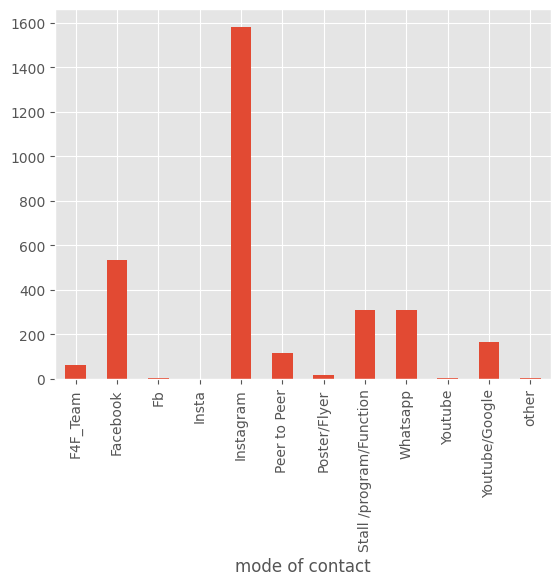

In [ ]:
df_frequency.plot(kind='bar')

In [ ]:
# Comment Analysis
df_comments = df.groupby('comments').size()
df_comments.sort_values(ascending=False).head(15)

,0
comments,
Interested Farmer,763
Mango,306
Called to get information about F4F,76
Not Desided,71
Guava,67
Sitaphal,62
Not Descided,56
Not Descide,51
"Mango,Sitaphal",31


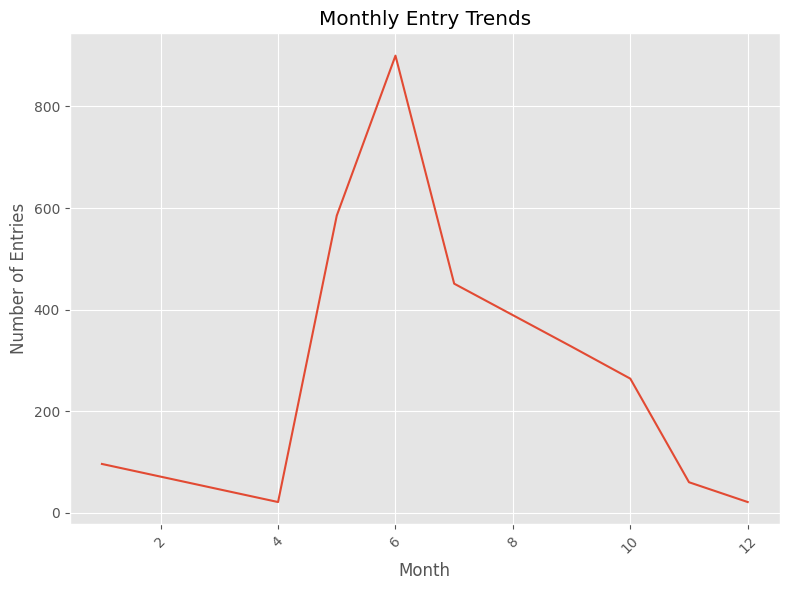

In [ ]:
#Trend Analysis: Analyze call frequency trends by date to identify high-activity periods of dataframe df
#Convert the 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])
# Monthly Trends
df['Month'] = df['Date'].dt.month
monthly_trends_2024 = df.groupby('Month').size().reset_index(name='Entries')
plt.figure(figsize=(8, 6))
plt.plot(monthly_trends_2024['Month'], monthly_trends_2024['Entries'])
plt.title('Monthly Entry Trends')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rreason : Kharif Crop

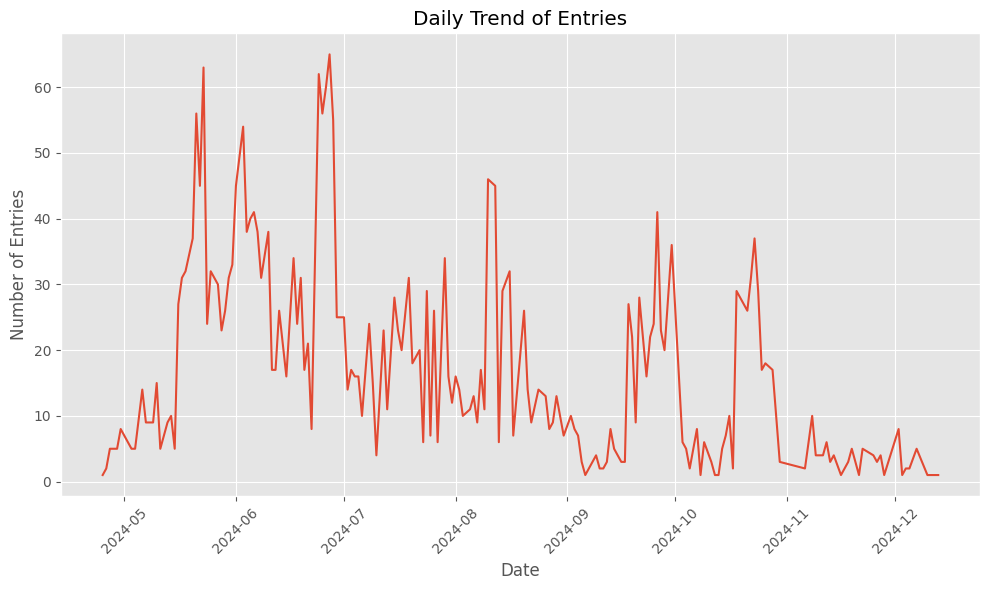

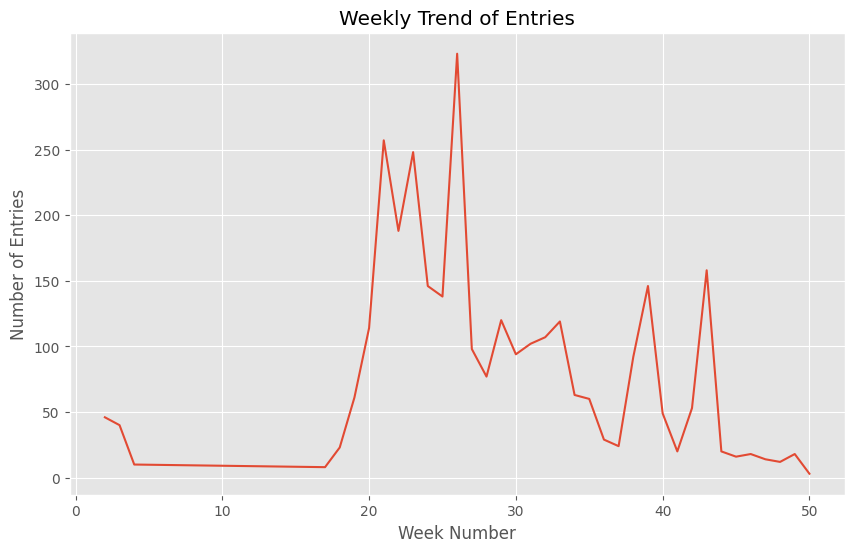

In [ ]:
# Daily Trend Analysis
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2024
df_2024 = df[df['Date'].dt.year == 2024]

# Check if there's any data for 2024
if df_2024.empty:
    print("No data found for the year 2024.")
    exit()

# Daily trend
daily_entries = df_2024.groupby(df_2024['Date'].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(daily_entries.index, daily_entries.values)
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.title('Daily Trend of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly trend
df['Week'] = df['Date'].dt.isocalendar().week
weekly_entries = df.groupby('Week').size()
plt.figure(figsize=(10, 6))
plt.plot(weekly_entries.index, weekly_entries.values)
plt.xlabel('Week Number')
plt.ylabel('Number of Entries')
plt.title('Weekly Trend of Entries')
plt.show()


Number of positive comments: 902
Number of negative comments: 20
Number of neutral comments: 2192


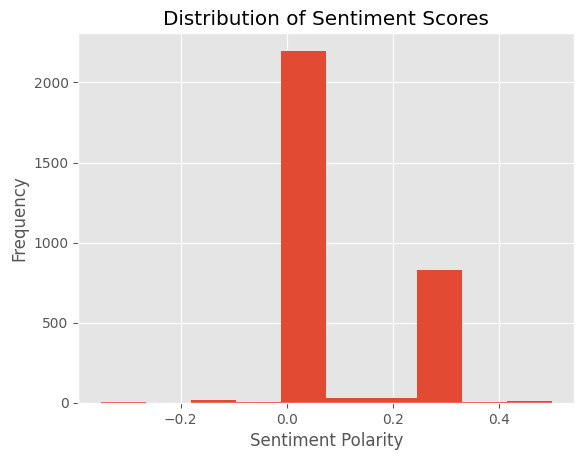

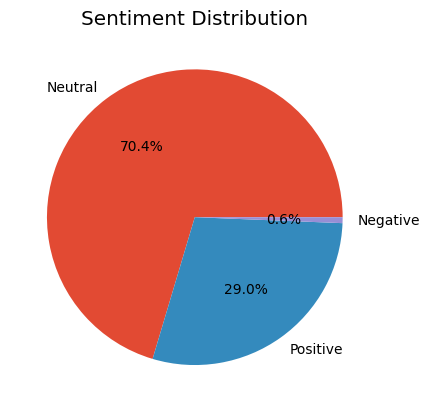

In [ ]:
# Sentiment Analysis
!pip install textblob

import pandas as pd
from textblob import TextBlob

comments_column_name = "Any other Comments/Feedback/Suggestions"

# Function to get sentiment polarity
def get_sentiment(text):
    try:
        analysis = TextBlob(str(text))  # Handle potential NaN values
        return analysis.sentiment.polarity
    except Exception as e:
        print(f"Error analyzing text: {text}, Error: {e}")
        return 0  # Return a neutral sentiment in case of an error

# Apply the sentiment analysis to the correct column
df['Sentiment'] = df['comments'].apply(get_sentiment)


# Analyze and visualize sentiment
positive_comments = df[df['Sentiment'] > 0]
negative_comments = df[df['Sentiment'] < 0]
neutral_comments = df[df['Sentiment'] == 0]

print(f"Number of positive comments: {len(positive_comments)}")
print(f"Number of negative comments: {len(negative_comments)}")
print(f"Number of neutral comments: {len(neutral_comments)}")

# Example visualization (histogram)
df['Sentiment'].hist()
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# Example visualization (pie chart)
sentiment_counts = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')).value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")  # Remove the y-axis label for a cleaner look
plt.show()